In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.preprocessing import StandardScaler, normalize, PowerTransformer, MinMaxScaler, RobustScaler, FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error


import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'E:/Code soft intern/code soft- sales prediction/advertising.csv')

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

<Axes: >

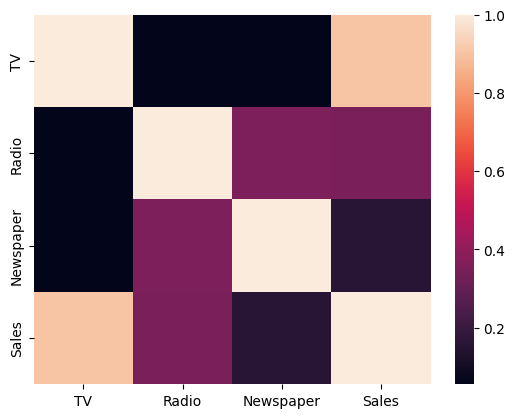

In [6]:
sns.heatmap(df.corr())

In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<Axes: >

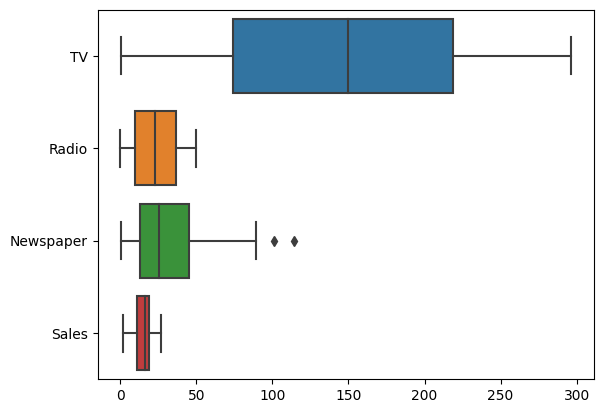

In [8]:
sns.boxplot(df , orient='h')

# so in newspaper there are little bit of outliers 

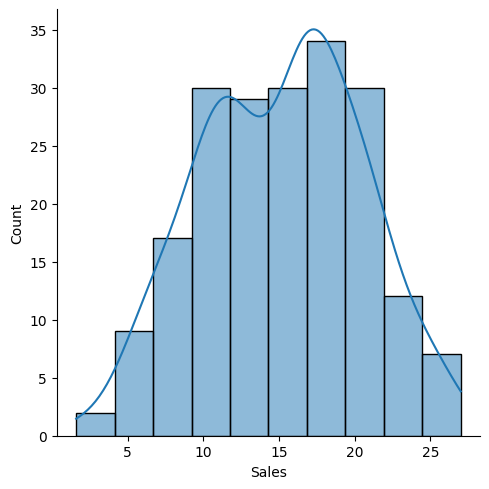

In [9]:
sns.displot(df, x='Sales', kde= True)

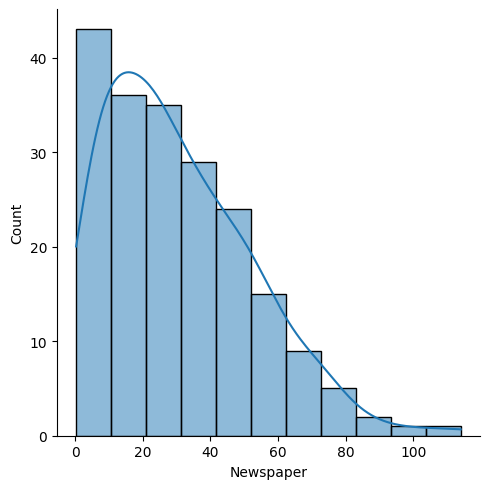

In [10]:
sns.displot(df, x='Newspaper', kde= True)

# little skewd data

# outliers clear

In [11]:
x = ["Newspaper"]
indexx = []
for i in x :
    q1 = df[i].quantile(0.25)
    q2 = df[i].quantile(0.75)

    iqr = q2 - q1

    max = q2+(1.5*iqr)

    a = df[df[i]>max].index

    for i in a :
        indexx.append(i)



In [12]:
x1 = df.drop(index=indexx)

In [13]:
x1.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

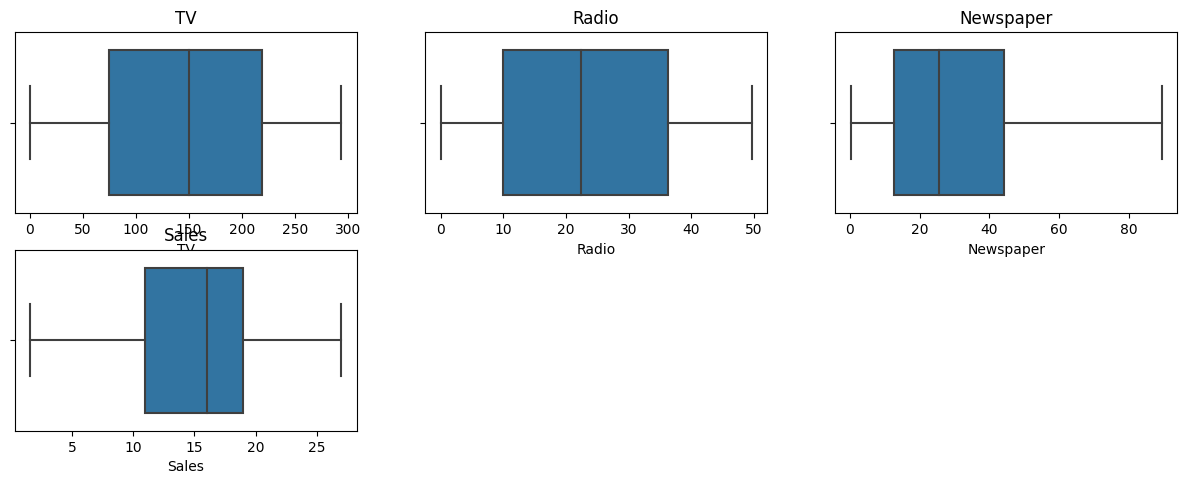

In [14]:
y = ['TV', 'Radio', 'Newspaper', 'Sales']

plt.figure(figsize=(15,8))
for i, j in enumerate(y):
    plt.subplot(3,3,i+1)
    sns.boxplot(x1 , x= j)
    plt.title(j)

# News paper is rightskewed 

<Axes: xlabel='Newspaper', ylabel='Density'>

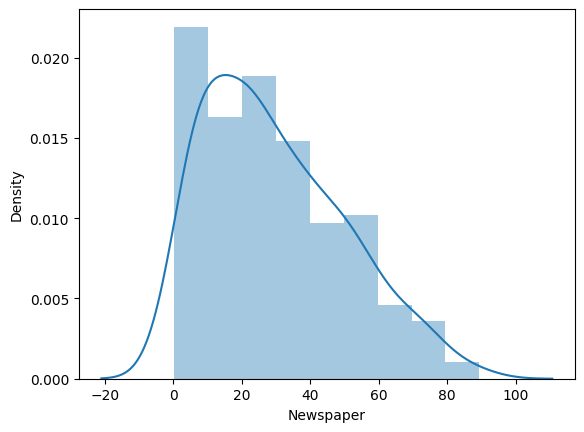

In [15]:
sns.distplot(x1['Newspaper'], kde=True)

In [16]:
x = x1.drop(columns='Sales')
y = x1['Sales']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=21)

In [18]:
sc = MinMaxScaler()
trans = FunctionTransformer(np.log1p)
sg = SGDRegressor(learning_rate='constant', max_iter=1000, eta0=0.01)

In [19]:

x_train[['Newspaper','Radio', 'TV']]= sc.fit_transform(x_train[['Newspaper','Radio', 'TV']])
x_test[['Newspaper','Radio', 'TV']]= sc.fit_transform(x_test[['Newspaper','Radio', 'TV']])

In [20]:
x_train[['Newspaper','Radio', 'TV']] = trans.fit_transform(x_train[['Newspaper','Radio', 'TV']])
x_test[['Newspaper','Radio', 'TV']] = trans.fit_transform(x_test[['Newspaper','Radio', 'TV']])

In [21]:
sg = SGDRegressor(learning_rate='constant', max_iter=1000, eta0=0.01)

In [22]:
sg.fit(x_train, y_train)

SGDRegressor(learning_rate='constant')

In [23]:
pred = sg.predict(x_test)

In [24]:
r2_score(y_test, pred)

0.9411575641900364

In [25]:
mean_absolute_error(y_test, pred)

1.0812999417646634

In [26]:
mean_squared_error(y_test, pred)

1.814435275613291

<Axes: xlabel='Sales', ylabel='Density'>

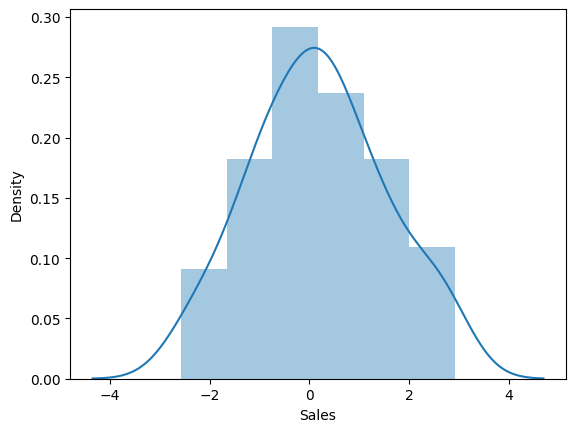

In [27]:
sns.distplot(y_test - pred)

In [31]:
pd.DataFrame({"test_data":y_test, "predicted_data":pred})

,test_data,predicted_data
145,10.3,12.633077
9,15.6,15.860546
18,11.3,10.689414
21,17.5,17.975616
46,10.6,10.835266
6,11.8,11.135897
53,21.2,19.728088
92,19.4,20.351437
131,17.7,18.937633
183,26.2,24.247746
